In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
taxi_tickets = pd.read_csv('../taxi_ticket_data/taxi_tickets_by_ward.csv')
print(taxi_tickets.dtypes)
print(taxi_tickets.shape)
taxi_tickets.head()

Ticket Number              int64
License Plate Number      object
License Plate State       object
License Plate Type        object
Ticket Make               object
Issue Date                object
Violation Location        object
Violation Code            object
Violation Description     object
Badge                     object
Unit                      object
Ticket Queue              object
Hearing Dispo             object
Latitude                 float64
Longitude                float64
Ward                       int64
dtype: object
(261936, 16)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
0,55884862,4079TX,IL,TXI,FORD,01/02/2009 10:05 am,5210 N BROADWAY,0964190,EXPIRED METER OR OVERSTAY,8117,20,Paid,Did Not Challenge,41.976507,-87.659944,48
1,54574383,5141TX,IL,TXI,MERC,01/06/2009 06:53 am,4707 N PULASKI,0964170B,"TRUCK,MOTOR HOME, BUS BUSINESS STREET",12769,17,Paid,Did Not Challenge,41.966575,-87.727904,39
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
3,9177658970,25368TX,IL,TXI,OLDS,01/10/2009 10:30 am,6410 N CLAREMONT AV,0964190,EXPIRED METER OR OVERSTAY,197,498,Paid,Did Not Challenge,41.997942,-87.688741,50
4,55835485,3001TX,IL,TXI,FORD,01/01/2009 06:35 pm,36 W 26TH,0976160F,EXPIRED PLATES OR TEMPORARY REGISTRATION,19503,21,Bankruptcy,Did Not Challenge,41.845162,-87.628529,3


In [22]:
res_tickets = taxi_tickets.loc[taxi_tickets['Violation Code'] == '0964170A']
print(res_tickets.shape)
res_tickets.head()

(39096, 16)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward
2,55388795,25495TX,IL,TXI,MERC,01/05/2009 04:19 am,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38
15,55984582,3529TX,IL,TXI,MERZ,01/18/2009 10:04 pm,2822 W BRYN MAWR,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",19838,20,Paid,Did Not Challenge,41.983193,-87.699957,40
22,55772826,1262TX,IL,TXI,FORD,01/19/2009 07:30 am,6320 RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Did Not Challenge,42.010156,-87.682322,49
27,56126178,1515TX,IL,TXI,FORD,02/08/2009 02:53 pm,4219 N MILWAUKEE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",11128,16,Paid,Liable,41.957540,-87.751636,45
42,56062981,5410TX,IL,TXI,FORD,02/12/2009 06:10 am,6935 THOME,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Dismissed,DOR Withdraw,41.994834,-87.739869,39


Ward by number of taxi residential parking tickets issued


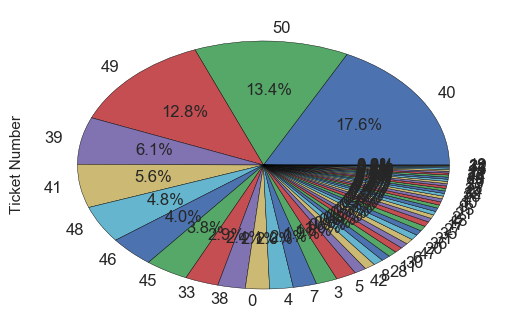

In [6]:
ward_group = res_tickets.groupby(['Ward'])['Ticket Number'].count()
ward_group = ward_group.sort_values(ascending=False)
print('Ward by number of taxi residential parking tickets issued')
ward_group.plot(kind='pie',autopct='%1.1f%%', fontsize=12)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Number of residential parking tickets issued to taxis over time


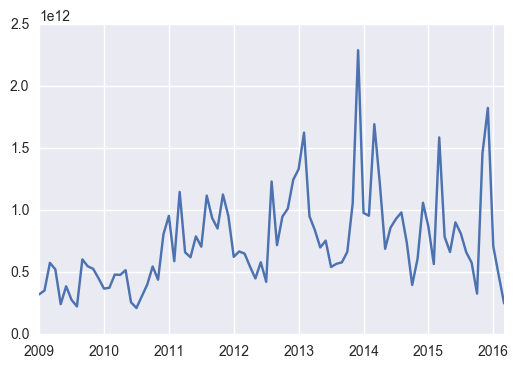

In [7]:
res_tickets['Issue Date'] = pd.to_datetime(res_tickets['Issue Date'])
res_tickets = res_tickets.set_index(pd.DatetimeIndex(res_tickets['Issue Date']))
res_ticket_series = res_tickets['Ticket Number'].resample('M').sum()
print('Number of residential parking tickets issued to taxis over time')
res_ticket_series.plot()

## Residential Ticket Times

Seems like most residential parking tickets to taxis come in the morning

Hour of day by number of taxi residential parking tickets issued


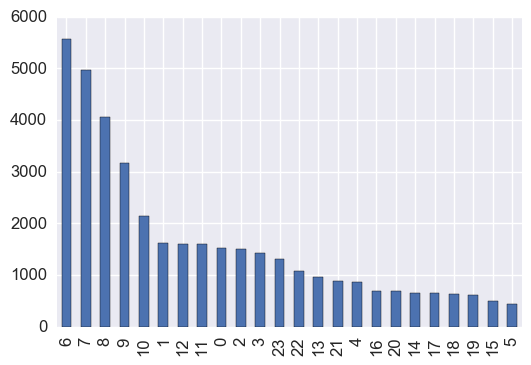

In [10]:
hour_group = res_tickets.groupby(res_tickets.index.hour)['Ticket Number'].count()
hour_group = hour_group.sort_values(ascending=False)
print('Hour of day by number of taxi residential parking tickets issued')
hour_group.plot(kind='bar', fontsize=12)

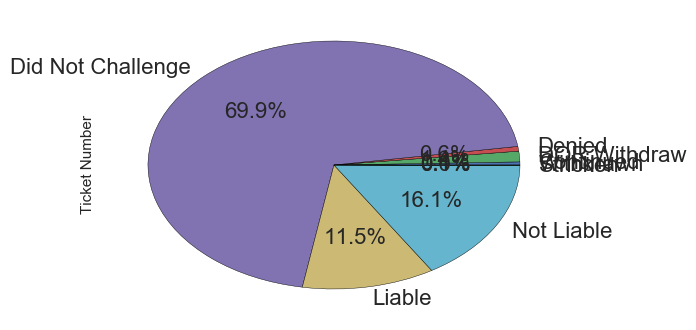

In [11]:
res_hearing = res_tickets.groupby(['Hearing Dispo'])['Ticket Number'].count()
res_hearing.plot(kind='pie',autopct='%1.1f%%', fontsize=16)

## Top Streets for Residential Tickets

* Top street for residential parking tickets for taxis by far is N Ridge
* From looking at a spatial join in QGIS, the area of ticketing on N Ridge only really touches three wards, and their tickets counts are:
    * 49th: 1,429
    * 50th: 929
    * 40th: 427

In [12]:
# Removing the initial address numbers to find streets with the highest number of tickets
import re

res_tickets['Violation Street'] = res_tickets['Violation Location'].apply(lambda x: re.sub(r'^\d{1,6}\s','',x))
res_tickets.head()

,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward,Violation Street
2009-01-05 04:19:00,55388795,25495TX,IL,TXI,MERC,2009-01-05 04:19:00,5721 W EASTWOOD,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",13250,16,Notice,Did Not Challenge,41.964930,-87.770331,38,W EASTWOOD
2009-01-18 22:04:00,55984582,3529TX,IL,TXI,MERZ,2009-01-18 22:04:00,2822 W BRYN MAWR,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",19838,20,Paid,Did Not Challenge,41.983193,-87.699957,40,W BRYN MAWR
2009-01-19 07:30:00,55772826,1262TX,IL,TXI,FORD,2009-01-19 07:30:00,6320 RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Did Not Challenge,42.010156,-87.682322,49,RIDGE
2009-02-08 14:53:00,56126178,1515TX,IL,TXI,FORD,2009-02-08 14:53:00,4219 N MILWAUKEE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",11128,16,Paid,Liable,41.957540,-87.751636,45,N MILWAUKEE
2009-02-12 06:10:00,56062981,5410TX,IL,TXI,FORD,2009-02-12 06:10:00,6935 THOME,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Dismissed,DOR Withdraw,41.994834,-87.739869,39,THOME


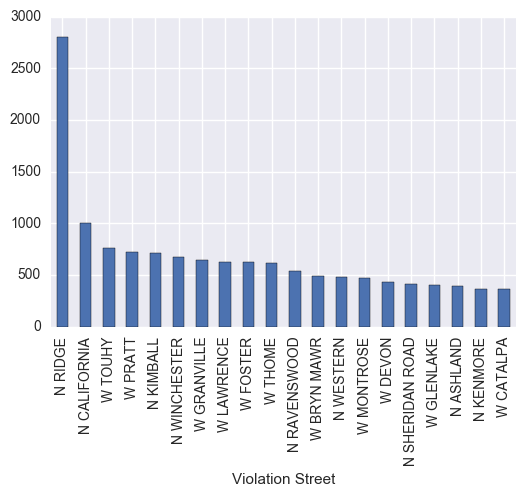

In [15]:
res_top_streets = res_tickets.groupby(['Violation Street'])['Ticket Number'].count()
res_top_streets = res_top_streets.sort_values(ascending=False)[:20]
res_top_streets.plot(kind='bar')

In [16]:
print('Mean number residential taxi tickets on top 20 streets is: {}'.format(res_top_streets.mean()))
res_rest_streets = res_tickets.groupby(['Violation Street'])['Ticket Number'].count()
res_rest_streets = res_rest_streets.sort_values(ascending=False)[20:]
print('Mean number residential taxi tickets on other streets is: {}'.format(res_rest_streets.mean()))

Mean number residential taxi tickets on top 20 streets is: 676.3
Mean number residential taxi tickets on other streets is: 10.80270384452894


In [18]:
ridge_tickets = res_tickets.loc[res_tickets['Violation Street'] == 'N RIDGE']
print(ridge_tickets.shape)
ridge_tickets.head()

(2802, 17)


,Ticket Number,License Plate Number,License Plate State,License Plate Type,Ticket Make,Issue Date,Violation Location,Violation Code,Violation Description,Badge,Unit,Ticket Queue,Hearing Dispo,Latitude,Longitude,Ward,Violation Street
2009-11-10 06:15:00,57823105,1156TX,IL,TXI,FORD,2009-11-10 06:15:00,6305 N RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Did Not Challenge,41.995690,-87.675678,40,N RIDGE
2010-10-05 06:30:00,58681323,2340TX,IL,TXI,FORD,2010-10-05 06:30:00,6830 N RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",14334,24,Dismissed,Not Liable,42.005558,-87.680400,50,N RIDGE
2010-12-29 06:31:00,59012042,5008TX,IL,TXI,FORD,2010-12-29 06:31:00,7226 N RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",14334,24,Paid,Did Not Challenge,42.012758,-87.683304,49,N RIDGE
2010-12-14 06:05:00,58967102,5955TX,IL,TXI,FORD,2010-12-14 06:05:00,6359 N RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",17392,24,Paid,Liable,41.997262,-87.676394,40,N RIDGE
2011-03-07 06:29:00,59449376,2043TX,IL,TXI,FORD,2011-03-07 06:29:00,7054 N RIDGE,0964170A,"TRUCK,RV,BUS, OR TAXI RESIDENTIAL STREET",14334,24,Paid,Did Not Challenge,42.009545,-87.682149,50,N RIDGE


Number of residential parking tickets issued to taxis on N Ridge over time


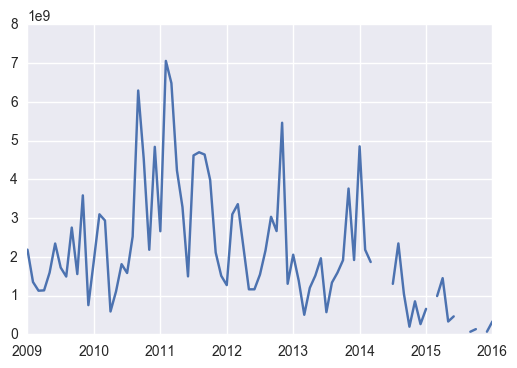

In [19]:
ridge_months = ridge_tickets['Ticket Number'].resample('M').sum()
print('Number of residential parking tickets issued to taxis on N Ridge over time')
ridge_months.plot()